In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format
RANDOM_STATE = 42
from datetime import date
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('DelayedFlights.csv')

In [3]:
df.head().T


,0,1,2,3,4
Unnamed: 0,0,1,2,4,5
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,"2,003.00",754.00,628.00,"1,829.00","1,940.00"
CRSDepTime,1955,735,620,1755,1915
ArrTime,"2,211.00","1,002.00",804.00,"1,959.00","2,121.00"
CRSArrTime,2225,1000,750,1925,2110
UniqueCarrier,WN,WN,WN,WN,WN


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [5]:
columnas= df

In [6]:
for i in columnas:
    print('\n',i,df[i].unique(),'\n')



 Unnamed: 0 [      0       1       2 ... 7009718 7009726 7009727] 


 Year [2008] 


 Month [ 1  2  3  4  5  6  7  8  9 10 11 12] 


 DayofMonth [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31  2  1] 


 DayOfWeek [4 5 6 7 1 2 3] 


 DepTime [2003.  754.  628. ...  502.  503.  425.] 


 CRSDepTime [1955  735  620 ... 2331   48  140] 


 ArrTime [2211. 1002.  804. ...  401.  437.  405.] 


 CRSArrTime [2225 1000  750 ...  305  334  147] 


 UniqueCarrier ['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO'] 


 FlightNum [ 335 3231  448 ... 6869 6870 5272] 


 TailNum ['N712SW' 'N772SW' 'N428WN' ... 'N75428' 'N75429' 'N78008'] 


 ActualElapsedTime [ 128.   96.   90.  101.  240.  130.  121.   52.  228.  226.  123.   56.
   57.   54.   59.  155.  165.  147.  154.  146.  145.  135.  127.  153.
  150.  152.  163.  136.   69.   70.  143.   71.   99.   86.   65.   63.
  119.  134.   51.   75.   74.   8

 ArrDelay [ -14.    2.   14. ...  880. 1279.  991.] 


 DepDelay [  8.  19.  34. ... 956. 810. 925.] 


 Origin ['IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LIT' 'MAF' 'MCI' 'MCO'
 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PBI' 'PDX' 'PHL' 'PHX'
 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC'
 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BHM'
 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN' 'DTW' 'ELP'
 'FLL' 'GEG' 'HOU' 'HRL' 'ROC' 'ORD' 'EWR' 'SYR' 'IAH' 'CRW' 'FAT' 'COS'
 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'MEM' 'BTV' 'MKE' 'LFT' 'BRO' 'PWM' 'MSP'
 'SRQ' 'CLT' 'CVG' 'GSO' 'SHV' 'DCA' 'TYS' 'GSP' 'RIC' 'DFW' 'BGR' 'DAY'
 'GRR' 'CHS' 'CAE' 'TLH' 'XNA' 'GPT' 'VPS' 'LGA' 'ATL' 'MSN' 'SAV' 'BTR'
 'LEX' 'LRD' 'MOB' 'MTJ' 'GRK' 'AEX' 'PNS' 'ABE' 'HSV' 'CHA' 'MFE' 'MLU'
 'DSM' 'MGM' 'AVL' 'LCH' 'BOS' 'MYR' 'CLL' 'DAB' 'ASE' 'ATW' 'BMI' 'CAK'
 'CID' 'CPR' 'EGE' 'FLG' 'FSD' 'FWA' 'GJT' 'GRB' 'HNL' 'KOA' 'LAN' 'LIH'
 'MBS' 'MDT'

 6.470e+02 7.680e+02 9.150e+02 6.400e+02 3.960e+02] 


 NASDelay [      nan 0.000e+00 6.000e+00 2.800e+01 4.000e+00 2.200e+01 8.000e+00
 5.000e+00 7.000e+00 1.000e+01 1.000e+00 3.000e+00 2.000e+00 1.200e+01
 4.600e+01 2.300e+01 2.000e+01 1.900e+01 5.400e+01 6.700e+01 6.300e+01
 1.310e+02 1.760e+02 9.000e+00 1.400e+01 1.100e+01 1.800e+01 3.500e+01
 4.200e+01 1.300e+01 3.600e+01 1.500e+01 2.030e+02 1.700e+01 2.600e+01
 2.700e+01 3.300e+01 1.600e+01 2.500e+01 3.700e+01 1.370e+02 5.100e+01
 9.600e+01 5.000e+01 2.900e+01 4.300e+01 3.000e+01 3.400e+01 3.100e+01
 7.100e+01 1.050e+02 9.100e+01 1.770e+02 4.900e+01 2.400e+01 2.100e+01
 3.900e+01 1.390e+02 1.150e+02 5.900e+01 4.000e+01 8.000e+01 1.120e+02
 3.200e+01 1.510e+02 4.400e+01 1.100e+02 6.500e+01 6.600e+01 4.100e+01
 6.000e+01 4.700e+01 8.800e+01 4.800e+01 5.600e+01 3.800e+01 1.620e+02
 1.600e+02 5.500e+01 6.800e+01 6.200e+01 5.800e+01 7.000e+01 7.200e+01
 9.400e+01 4.500e+01 9.200e+01 6.400e+01 7.400e+01 2.200e+02 1.180e+02
 1.560e+02 7

In [7]:
for i in columnas:
    print('\n',i,df[i].value_counts(),'\n')


 Unnamed: 0 2047       1
4111738    1
4138313    1
4142411    1
4130125    1
          ..
1865432    1
340539     1
6053597    1
6047454    1
0          1
Name: Unnamed: 0, Length: 1936758, dtype: int64 


 Year 2008    1936758
Name: Year, dtype: int64 


 Month 12    203385
6     200914
3     200842
2     189534
1     183527
7     182945
8     162648
4     155264
5     153072
11    105563
10    103525
9      95539
Name: Month, dtype: int64 


 DayofMonth 22    71649
21    70168
1     67815
7     67478
15    65587
27    65374
18    65132
20    65071
19    64470
14    64407
24    64202
10    63385
2     63339
11    63331
23    63320
17    63110
8     62979
4     62682
26    62549
9     62057
6     61814
12    61517
13    61278
16    61152
28    61093
3     60389
5     60000
25    59056
29    56893
30    56721
31    38740
Name: DayofMonth, dtype: int64 


 DayOfWeek 5    323259
1    290933
4    289451
7    286111
3    262805
2    260943
6    223256
Name: DayOfWeek, dtype: int64 


 DepT


 TaxiOut 11.00     129633
10.00     129556
12.00     126355
13.00     119526
9.00      118894
14.00     110576
15.00     101762
8.00      101366
16.00      89584
17.00      79078
7.00       76316
18.00      69182
19.00      60766
20.00      54318
21.00      46859
6.00       44971
22.00      41374
23.00      36462
24.00      32070
25.00      29056
26.00      25478
27.00      22900
28.00      20264
5.00       18601
29.00      18539
30.00      16865
31.00      15064
32.00      13601
33.00      12382
34.00      11086
35.00      10264
36.00       9462
37.00       8504
38.00       8070
39.00       7160
40.00       6575
41.00       6103
42.00       5666
43.00       5294
44.00       4880
45.00       4625
4.00        4410
46.00       4240
47.00       4109
48.00       3768
49.00       3400
50.00       3238
51.00       3138
52.00       2896
53.00       2663
54.00       2468
55.00       2383
56.00       2184
57.00       2086
58.00       1977
59.00       1873
60.00       1816
61.00       1707
62.0

Vamos a usar la matriz de correlación, para ver que relación existe entre las variables existentes

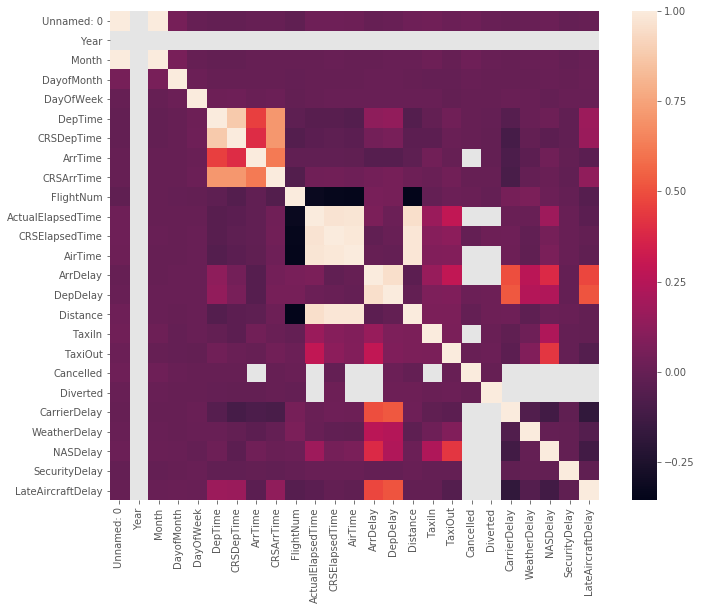

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

Se puede observar que hay muy estrecha correlacion, entre las variables AirTime, Distance,ActualElapsedTime y CRSElapsed Time; eso implica, que una variable, como AirTime, tiene la misma informacion que las otras 3; solo voy a eliminar, Actual y CRSE,que se especifican en minutos, al igual que Airtime, mientras que Distance, aunque facilite la misma informacion, pero viene en millas

Creacion de nuevas variables, e eliminación de las que no necesitamos o ,las hemos reemplazado por otras

In [9]:
df['DepDate'] = pd.to_datetime(df.Year*10000+df.Month*100+df.DayofMonth,format='%Y%m%d')

In [10]:
df.drop(columns=["Unnamed: 0","Year","Month","DayofMonth"], inplace=True)

Definimos la variable "Situacion", donde tiene un valor de 0, si el vuelo va en hora, de 1, si el vuelo se retrasa\
se retrasa entre 15 y 60 minutos, de 2, si retrasa, más de 60 minutos, de 3, si es desviado o 4, si es cancelado


In [11]:
for dataset in df:
    df.loc[df['ArrDelay'] <= 15, 'Situacion'] = 0
    df.loc[df['ArrDelay'] >= 15, 'Situacion'] = 1
    df.loc[df['ArrDelay'] >= 60, 'Situacion'] = 2
    df.loc[df['Diverted'] == 1, 'Situacion'] = 3
    df.loc[df['Cancelled'] == 1, 'Situacion'] = 4

In [12]:
df.drop(columns=["ArrDelay","Diverted","Cancelled"], inplace=True)


In [13]:
df['CancellationCode'].value_counts()

N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64

Transformamos de Categorica a numerica CancellationCode


In [14]:
df.loc[df["CancellationCode"] =="A", 'CancellationCode'] = "0"
df.loc[df["CancellationCode"] =="B", 'CancellationCode'] = "1"
df.loc[df["CancellationCode"] =="C", 'CancellationCode'] = "2"

Voy a eliminar, las siguientes columnas, ya que no aportan informacion relevante: DepTime, ArrTime ,CRSArrTime,TailNum(teniendo en cuenta, que tenemos , casi 2 mill de registros, y los valores que más se repiten, no llegan al 0,1% del total,no es significativa esta variable)

In [15]:
df.drop(columns=["DepTime","ArrTime","CRSArrTime","TailNum"], inplace=True)

In [16]:
df.drop(columns=["ActualElapsedTime","CRSElapsedTime"], inplace=True)

In [17]:
df.head().T

,0,1,2,3,4
DayOfWeek,4,4,4,4,4
CRSDepTime,1955,735,620,1755,1915
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,3920,378
AirTime,116.00,113.00,76.00,77.00,87.00
DepDelay,8.00,19.00,8.00,34.00,25.00
Origin,IAD,IAD,IND,IND,IND
Dest,TPA,TPA,BWI,BWI,JAX
Distance,810,810,515,515,688
TaxiIn,4.00,5.00,3.00,3.00,4.00


In [18]:
for i in columnas:
    print('\n',i,df[i].value_counts(),'\n')


 DayOfWeek 5    323259
1    290933
4    289451
7    286111
3    262805
2    260943
6    223256
Name: DayOfWeek, dtype: int64 


 CRSDepTime 1800    13925
1700    13892
1900    13198
1600    12737
1500    12635
        ...  
137         1
310         1
250         1
13          1
227         1
Name: CRSDepTime, Length: 1207, dtype: int64 


 UniqueCarrier WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64 


 FlightNum 16      1586
50      1550
40      1507
15      1471
44      1447
        ... 
7384       1
6231       1
6866       1
7712       1
6188       1
Name: FlightNum, Length: 7499, dtype: int64 


 AirTime 45.00     18374
46.00     18084
52.00     18052
44.00     18019
53.00     17995
          ...  
652.00        1
655.00        1
664.00 


 CancellationCode N    1936125
1        307
0        246
2         80
Name: CancellationCode, dtype: int64 


 CarrierDelay 0.00        591049
6.00         22799
7.00         21500
15.00        20361
8.00         19506
             ...  
893.00           1
898.00           1
902.00           1
904.00           1
1,291.00         1
Name: CarrierDelay, Length: 983, dtype: int64 


 WeatherDelay 0.00        1148570
10.00          2868
6.00           2738
15.00          2709
7.00           2527
             ...   
475.00            1
750.00            1
745.00            1
1,352.00          1
510.00            1
Name: WeatherDelay, Length: 599, dtype: int64 


 NASDelay 0.00        588995
1.00         34060
2.00         33177
3.00         31615
4.00         29825
             ...  
903.00           1
914.00           1
919.00           1
1,009.00         1
511.00           1
Name: NASDelay, Length: 574, dtype: int64 


 SecurityDelay 0.00      1241483
7.00          350
6.00          327
8

Resumen estadistico

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,"1,936,758.00",3.98,2.00,1.00,2.00,4.00,6.00,7.00
CRSDepTime,"1,936,758.00","1,467.47",424.77,0.00,"1,135.00","1,510.00","1,815.00","2,359.00"
FlightNum,"1,936,758.00","2,184.26","1,944.70",1.00,610.00,"1,543.00","3,422.00","9,742.00"
AirTime,"1,928,371.00",108.28,68.64,0.00,58.00,90.00,137.00,"1,091.00"
DepDelay,"1,936,758.00",43.19,53.40,6.00,12.00,24.00,53.00,"2,467.00"
Distance,"1,936,758.00",765.69,574.48,11.00,338.00,606.00,998.00,"4,962.00"
TaxiIn,"1,929,648.00",6.81,5.27,0.00,4.00,6.00,8.00,240.00
TaxiOut,"1,936,303.00",18.23,14.34,0.00,10.00,14.00,21.00,422.00
CarrierDelay,"1,247,488.00",19.18,43.55,0.00,0.00,2.00,21.00,"2,436.00"
WeatherDelay,"1,247,488.00",3.70,21.49,0.00,0.00,0.00,0.00,"1,352.00"


In [20]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 19 columns):
 #   Column             Dtype         
---  ------             -----         
 0   DayOfWeek          int64         
 1   CRSDepTime         int64         
 2   UniqueCarrier      object        
 3   FlightNum          int64         
 4   AirTime            float64       
 5   DepDelay           float64       
 6   Origin             object        
 7   Dest               object        
 8   Distance           int64         
 9   TaxiIn             float64       
 10  TaxiOut            float64       
 11  CancellationCode   object        
 12  CarrierDelay       float64       
 13  WeatherDelay       float64       
 14  NASDelay           float64       
 15  SecurityDelay      float64       
 16  LateAircraftDelay  float64       
 17  DepDate            datetime64[ns]
 18  Situacion          float64       
dtypes: datetime64[ns](1), float64(10), int64(4), object(4)
memory u

In [21]:
df.shape

(1936758, 19)

Encontrar las variables con nulos

In [22]:
df.isnull().sum()


DayOfWeek                 0
CRSDepTime                0
UniqueCarrier             0
FlightNum                 0
AirTime                8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
CancellationCode          0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
DepDate                   0
Situacion                 0
dtype: int64

Analizar variables que tienen nulos

In [23]:
df["AirTime"].value_counts()

45.00     18374
46.00     18084
52.00     18052
44.00     18019
53.00     17995
          ...  
652.00        1
655.00        1
664.00        1
733.00        1
630.00        1
Name: AirTime, Length: 650, dtype: int64

Convierto los nulos en un numero extremo,como la media

In [24]:
df['AirTime'].fillna(value=df['AirTime'].mean(), inplace=True)

In [25]:
df["AirTime"] = df["AirTime"].astype(int)

In [26]:
df["AirTime"] 

0          116
1          113
2           76
3           77
4           87
          ... 
1936753    120
1936754     78
1936755    122
1936756     89
1936757    104
Name: AirTime, Length: 1936758, dtype: int32

In [27]:
df["TaxiIn"].value_counts()

4.00      323427
5.00      314063
6.00      239676
3.00      234686
7.00      177889
8.00      131573
9.00       96653
2.00       82221
10.00      77363
11.00      52745
12.00      39215
13.00      29521
14.00      22002
15.00      17729
16.00      12887
17.00      10356
18.00       8173
1.00        7145
19.00       6517
20.00       5851
21.00       4642
22.00       3976
23.00       3328
24.00       2861
25.00       2660
26.00       2237
27.00       1966
28.00       1689
29.00       1499
30.00       1381
31.00       1186
32.00       1076
33.00        962
34.00        853
35.00        808
36.00        641
37.00        587
38.00        586
39.00        532
40.00        520
42.00        389
41.00        378
43.00        337
44.00        291
45.00        290
46.00        263
48.00        247
47.00        244
49.00        222
50.00        194
52.00        171
51.00        156
54.00        141
55.00        135
53.00        130
57.00        127
0.00         119
60.00        117
56.00        1

In [28]:
df['TaxiIn'].fillna(value=df['TaxiIn'].mean(), inplace=True)

In [29]:
df["TaxiIn"] = df["TaxiIn"].astype(int)

In [30]:
df['TaxiIn']


0           4
1           5
2           3
3           3
4           4
           ..
1936753     9
1936754    15
1936755     8
1936756    13
1936757     8
Name: TaxiIn, Length: 1936758, dtype: int32

In [31]:
df['TaxiIn'].value_counts()

4      323427
5      314063
6      246786
3      234686
7      177889
8      131573
9       96653
2       82221
10      77363
11      52745
12      39215
13      29521
14      22002
15      17729
16      12887
17      10356
18       8173
1        7145
19       6517
20       5851
21       4642
22       3976
23       3328
24       2861
25       2660
26       2237
27       1966
28       1689
29       1499
30       1381
31       1186
32       1076
33        962
34        853
35        808
36        641
37        587
38        586
39        532
40        520
42        389
41        378
43        337
44        291
45        290
46        263
48        247
47        244
49        222
50        194
52        171
51        156
54        141
55        135
53        130
57        127
0         119
60        117
56        109
61        101
65         90
66         90
58         84
59         77
62         74
68         72
64         67
63         62
67         53
70         51
71         50
69    

In [32]:
df['TaxiOut'].fillna(value=df['TaxiOut'].mean(), inplace=True)

In [33]:
df["TaxiOut"] = df["TaxiOut"].astype(int)

In [34]:
df["TaxiOut"].value_counts()

11     129633
10     129556
12     126355
13     119526
9      118894
14     110576
15     101762
8      101366
16      89584
17      79078
7       76316
18      69637
19      60766
20      54318
21      46859
6       44971
22      41374
23      36462
24      32070
25      29056
26      25478
27      22900
28      20264
5       18601
29      18539
30      16865
31      15064
32      13601
33      12382
34      11086
35      10264
36       9462
37       8504
38       8070
39       7160
40       6575
41       6103
42       5666
43       5294
44       4880
45       4625
4        4410
46       4240
47       4109
48       3768
49       3400
50       3238
51       3138
52       2896
53       2663
54       2468
55       2383
56       2184
57       2086
58       1977
59       1873
60       1816
61       1707
62       1600
63       1522
64       1448
65       1371
66       1325
67       1214
3        1202
68       1189
69       1176
70       1083
71       1051
72        970
73        910
74    

In [35]:
df.isnull().sum()


DayOfWeek                 0
CRSDepTime                0
UniqueCarrier             0
FlightNum                 0
AirTime                   0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
CancellationCode          0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
DepDate                   0
Situacion                 0
dtype: int64

Hasta ahora, eran variables, con pocos nulos, en relación al total, y he considerado oportuno, sustituirlos por la media.



In [36]:
df_car_del = df.groupby("CarrierDelay").size().to_frame()

In [37]:
df_car_del

,0
CarrierDelay,
0.00,591049
1.00,18764
2.00,18751
3.00,18157
4.00,17459
...,...
"1,542.00",1
"1,552.00",1
"1,707.00",1


In [38]:
df_wt_del = df.groupby("WeatherDelay").size().to_frame()

In [39]:
df_wt_del

,0
WeatherDelay,
0.00,1148570
1.00,1747
2.00,1875
3.00,1936
4.00,1969
...,...
"1,148.00",1
"1,153.00",1
"1,225.00",1


In [40]:
df_nas_del = df.groupby("NASDelay").size().to_frame()

In [41]:
df_nas_del

,0
NASDelay,
0.00,588995
1.00,34060
2.00,33177
3.00,31615
4.00,29825
...,...
"1,195.00",1
"1,207.00",1
"1,289.00",1


In [42]:
df_sec_del = df.groupby("SecurityDelay").size().to_frame()

In [43]:
df_sec_del

,0
SecurityDelay,
0.00,1241483
1.00,180
2.00,192
3.00,201
4.00,232
5.00,213
6.00,327
7.00,350
8.00,286


Vamos a sustituir los nulos,por un numero extremo, que a la hora de modelizar, no se contempla ese numero que es -999

In [44]:
df.fillna(value=-999, inplace=True)

In [45]:
df.isnull().sum()

DayOfWeek            0
CRSDepTime           0
UniqueCarrier        0
FlightNum            0
AirTime              0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CancellationCode     0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
DepDate              0
Situacion            0
dtype: int64

Voy a convertir las variables float en int,para facilitarme su procesamiento

In [46]:
df["AirTime"] = df["AirTime"].astype(int)

In [47]:
df["DepDelay"] = df["DepDelay"].astype(int)

In [48]:
df["TaxiIn"] = df["TaxiIn"].astype(int)

In [49]:
df["TaxiOut"] = df["TaxiOut"].astype(int)

In [50]:
df["CarrierDelay"] = df["CarrierDelay"].astype(int)

In [51]:
df["WeatherDelay"] = df["WeatherDelay"].astype(int)

In [52]:
df["NASDelay"] = df["NASDelay"].astype(int)

In [53]:
df["SecurityDelay"] = df["SecurityDelay"].astype(int)

In [54]:
df["LateAircraftDelay"] = df["LateAircraftDelay"].astype(int)

In [55]:
df["Situacion"].value_counts()

1.00    799660
0.00    680883
2.00    447828
3.00      7754
4.00       633
Name: Situacion, dtype: int64

In [56]:
df["Situacion"] = df["Situacion"].astype(int)

Aerolineas con mas retrasos



Solo contemplo, vuelos, con mas de 15m ,ya que inferior a ese tiempo,no lo valoro como un retraso, siendo un avion.


In [57]:
vuelos_retrasados = df[(df.Situacion >= 1) &(df.Situacion < 3)]

In [58]:
vuelos_retrasados.T

,3,5,7,9,11,12,13,17,19,23,...,1936745,1936746,1936747,1936748,1936749,1936751,1936752,1936753,1936754,1936755
DayOfWeek,4,4,4,4,4,4,4,4,4,4,...,6,6,6,6,6,6,6,6,6,6
CRSDepTime,1755,1830,1510,1425,1255,1325,1625,1255,1945,1650,...,950,1355,1954,1221,1500,830,1520,1220,600,847
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,...,DL,DL,DL,DL,DL,DL,DL,DL,DL,DL
FlightNum,3920,509,1333,675,4,54,623,188,362,422,...,1554,1563,1586,1609,1611,1616,1620,1621,1631,1631
AirTime,77,230,107,213,110,49,47,143,134,118,...,68,117,50,64,79,82,27,120,78,122
DepDelay,34,67,94,27,28,51,32,87,82,82,...,35,34,12,33,28,51,32,30,57,80
Origin,IND,IND,IND,IND,IND,ISP,ISP,ISP,ISP,ISP,...,ATL,MSP,SLC,IND,SLC,ATL,HSV,MSP,RIC,ATL
Dest,BWI,LAS,MCO,PHX,TPA,BWI,BWI,FLL,MCO,MDW,...,ORF,ATL,BOI,ATL,PHX,PBI,ATL,ATL,ATL,IAH
Distance,515,1591,828,1489,838,220,220,1093,972,765,...,516,906,291,432,507,545,151,906,481,689
TaxiIn,3,3,6,7,4,2,5,6,6,6,...,4,9,4,9,4,8,9,9,15,8


In [59]:
vuelos_retrasados['UniqueCarrier'].value_counts()

WN    203559
AA    132257
MQ     97555
UA     95465
OO     88991
DL     72252
XE     72008
US     59508
CO     58958
EV     56781
NW     54744
YV     50646
FL     46991
OH     39293
B6     38232
9E     35631
AS     24012
F9     15940
HA      4325
AQ       340
Name: UniqueCarrier, dtype: int64

In [60]:
df_aer_retrasos = vuelos_retrasados.groupby('Situacion')['UniqueCarrier'].size().reset_index()

In [61]:
df_aer_retrasos


,Situacion,UniqueCarrier
0,1,799660
1,2,447828


Las compañias que tienen mas retrasos son 
WN    203559
AA    132257
MQ     97555
UA     95465
OO     88991
DL     72252
XE     72008
US     59508
CO     58958
EV     56781

Cuales son ,los vuelos más largo?

In [62]:
#contemplo, que la distancia minima de un vuelo , es de 50 millas, y de esa manera, elimino, los outliers de esta variable
distancia = vuelos_retrasados[(vuelos_retrasados.Distance >= 50)]

In [63]:
distancia['Distance'].value_counts(ascending=False)

337     8570
733     6518
761     5923
403     5890
296     5605
        ... 
1849       1
1405       1
2144       1
890        1
1004       1
Name: Distance, Length: 1392, dtype: int64

In [64]:
distancia['Distance'].mean()

741.8503293456871

In [65]:
distancia['AirTime'].min()

0

In [66]:
distancia['AirTime'].max()

1091

In [67]:
tiempo_vuelo = distancia[(distancia.AirTime >= 20)]

In [68]:
df_vuelos_largos = distancia.groupby('FlightNum')['AirTime'].max().reset_index()

In [69]:
df_vuelos_largos


,FlightNum,AirTime
0,1,548
1,2,511
2,3,549
3,4,374
4,5,507
...,...,...
7476,7828,148
7477,7829,74
7478,8403,149
7479,9740,93


In [70]:
df_vuelos_largos.sort_values(by = ["AirTime"], ascending = False, inplace = False)

,FlightNum,AirTime
19,21,1091
26,28,733
13,15,664
848,851,609
1269,1273,607
...,...,...
6211,6230,27
7307,7450,26
6856,6891,23
6875,6916,23


In [71]:
df_vuelos_largos.head(10)


,FlightNum,AirTime
0,1,548
1,2,511
2,3,549
3,4,374
4,5,507
5,6,506
6,7,577
7,8,463
8,9,394
9,10,364


Vuelos , más retrasados

In [72]:
df_mas_retrasos = distancia.groupby('FlightNum')['Situacion'].sum().reset_index()

In [73]:
df_mas_retrasos

,FlightNum,Situacion
0,1,659
1,2,706
2,3,894
3,4,686
4,5,679
...,...,...
7476,7828,74
7477,7829,52
7478,8403,1
7479,9740,7


In [74]:
df_mas_retrasos.sort_values(by = ["Situacion"], ascending = False, inplace = False
                           )

,FlightNum,Situacion
48,50,1391
319,321,1299
73,75,1292
376,378,1250
34,36,1206
...,...,...
7388,7712,1
6835,6866,1
7314,7458,1
6902,7010,1


In [75]:
df_mas_retrasos.head(10)

,FlightNum,Situacion
0,1,659
1,2,706
2,3,894
3,4,686
4,5,679
5,6,555
6,7,1029
7,8,815
8,9,782
9,10,903


Crear nuevas columnas

Velocidad media del vuelo y si el vuelo se ha retrasado o no

In [76]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1936748,1936749,1936750,1936751,1936752,1936753,1936754,1936755,1936756,1936757
DayOfWeek,4,4,4,4,4,4,4,4,4,4,...,6,6,6,6,6,6,6,6,6,6
CRSDepTime,1955,735,620,1755,1915,1830,700,1510,1020,1425,...,1221,1500,1522,830,1520,1220,600,847,1240,1103
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,...,DL,DL,DL,DL,DL,DL,DL,DL,DL,DL
FlightNum,335,3231,448,3920,378,509,100,1333,2272,675,...,1609,1611,1612,1616,1620,1621,1631,1631,1639,1641
AirTime,116,113,76,77,87,230,106,107,37,213,...,64,79,88,82,27,120,78,122,89,104
DepDelay,8,19,8,34,25,67,6,94,9,27,...,33,28,9,51,32,30,57,80,11,7
Origin,IAD,IAD,IND,IND,IND,IND,IND,IND,IND,IND,...,IND,SLC,MCI,ATL,HSV,MSP,RIC,ATL,IAD,SAT
Dest,TPA,TPA,BWI,BWI,JAX,LAS,MCO,MCO,MDW,PHX,...,ATL,PHX,ATL,PBI,ATL,ATL,ATL,IAH,ATL,ATL
Distance,810,810,515,515,688,1591,828,828,162,1489,...,432,507,692,545,151,906,481,689,533,874
TaxiIn,4,5,3,3,4,3,5,6,6,7,...,9,4,9,8,9,9,15,8,13,8


In [77]:
df["velocidad"] = (df["Distance"] / df["AirTime"])

In [78]:
df['velocidad']

0         6.98
1         7.17
2         6.78
3         6.69
4         7.91
          ... 
1936753   7.55
1936754   6.17
1936755   5.65
1936756   5.99
1936757   8.40
Name: velocidad, Length: 1936758, dtype: float64

In [79]:
#La velocidad, es en millas por minuto.


In [80]:
df['velocidad'].median()

6.730769230769231

In [81]:
df['delayed'] = (df['Situacion'] >= 0) & (df['Situacion'] < 3)



In [82]:
df['delayed'].value_counts()

True     1928371
False       8387
Name: delayed, dtype: int64

In [83]:
df["delayed"] = df["delayed"].astype(int)

In [84]:
df["delayed"].value_counts()

1    1928371
0       8387
Name: delayed, dtype: int64

In [85]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1936748,1936749,1936750,1936751,1936752,1936753,1936754,1936755,1936756,1936757
DayOfWeek,4,4,4,4,4,4,4,4,4,4,...,6,6,6,6,6,6,6,6,6,6
CRSDepTime,1955,735,620,1755,1915,1830,700,1510,1020,1425,...,1221,1500,1522,830,1520,1220,600,847,1240,1103
UniqueCarrier,WN,WN,WN,WN,WN,WN,WN,WN,WN,WN,...,DL,DL,DL,DL,DL,DL,DL,DL,DL,DL
FlightNum,335,3231,448,3920,378,509,100,1333,2272,675,...,1609,1611,1612,1616,1620,1621,1631,1631,1639,1641
AirTime,116,113,76,77,87,230,106,107,37,213,...,64,79,88,82,27,120,78,122,89,104
DepDelay,8,19,8,34,25,67,6,94,9,27,...,33,28,9,51,32,30,57,80,11,7
Origin,IAD,IAD,IND,IND,IND,IND,IND,IND,IND,IND,...,IND,SLC,MCI,ATL,HSV,MSP,RIC,ATL,IAD,SAT
Dest,TPA,TPA,BWI,BWI,JAX,LAS,MCO,MCO,MDW,PHX,...,ATL,PHX,ATL,PBI,ATL,ATL,ATL,IAH,ATL,ATL
Distance,810,810,515,515,688,1591,828,828,162,1489,...,432,507,692,545,151,906,481,689,533,874
TaxiIn,4,5,3,3,4,3,5,6,6,7,...,9,4,9,8,9,9,15,8,13,8


In [88]:
df.isnull().sum()

DayOfWeek            0
CRSDepTime           0
UniqueCarrier        0
FlightNum            0
AirTime              0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
CancellationCode     0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
DepDate              0
Situacion            0
velocidad            0
delayed              0
dtype: int64

In [86]:
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 21 columns):
 #   Column             Dtype         
---  ------             -----         
 0   DayOfWeek          int64         
 1   CRSDepTime         int64         
 2   UniqueCarrier      object        
 3   FlightNum          int64         
 4   AirTime            int32         
 5   DepDelay           int32         
 6   Origin             object        
 7   Dest               object        
 8   Distance           int64         
 9   TaxiIn             int32         
 10  TaxiOut            int32         
 11  CancellationCode   object        
 12  CarrierDelay       int32         
 13  WeatherDelay       int32         
 14  NASDelay           int32         
 15  SecurityDelay      int32         
 16  LateAircraftDelay  int32         
 17  DepDate            datetime64[ns]
 18  Situacion          int32         
 19  velocidad          float64       
 20  delayed            int32

No lo han pedido en el ejercicio , pero faltaría convertir las variables categoricas a númericas, ademas de suprimir algun
Outlier, en alguna variable, que no he utilizado, y por supuesto, crear mas variables, para analizar en profundidad.

In [91]:
df.to_csv('flight_delays.csv', index=True)